<a href="https://colab.research.google.com/github/Addi-debug/python-projects/blob/main/churn_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING LIBRARIES

# For numerical computations
import numpy as np

# For data manipulation
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For custom plot settings
from matplotlib import rcParams
from matplotlib.cm import rainbow

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# For splitting data into train/test sets
from sklearn.model_selection import train_test_split

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [ ]:
from google.colab import files

# This will open a file browser to upload your CSV
uploaded = files.upload()



Saving Churn.csv to Churn (3).csv


In [ ]:
import pandas as pd

# Replace 'Churn.csv' with the exact filename if it's different
df = pd.read_csv('Churn.csv')

# Preview the data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**CLEANING**

In [ ]:
# Check basic structure
print("Initial shape:", df.shape)
print("Basic Info:")
print(df.info())

Initial shape: (7043, 21)
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

In [ ]:
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (7043, 21)


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
#REMOVE DUPLICATES
df.drop_duplicates(inplace=True)

In [ ]:
# FIX 'TotalCharges' TYPE (just in case it's object)
if df['TotalCharges'].dtype == 'object':
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
#  ENCODE BINARY CATEGORICAL COLUMNS
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() == 2 and col != 'customerID':  # Skip ID
        df[col] = le.fit_transform(df[col])


In [ ]:
# CONVERT 'Churn' TO NUMERIC IF NEEDED
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# Final check
print("\nCleaned data sample:")
print(df.head())


Cleaned data sample:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No    

In [ ]:
# Convert gender back to original labels
df['gender'] = df['gender'].map({0: 'Female', 1: 'Male'})

# Verify the change
print(df['gender'].value_counts())
print(df.head())


gender
Male      3555
Female    3488
Name: count, dtype: int64
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0    

In [ ]:
# Print the column names
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


**VISUALIZATION**

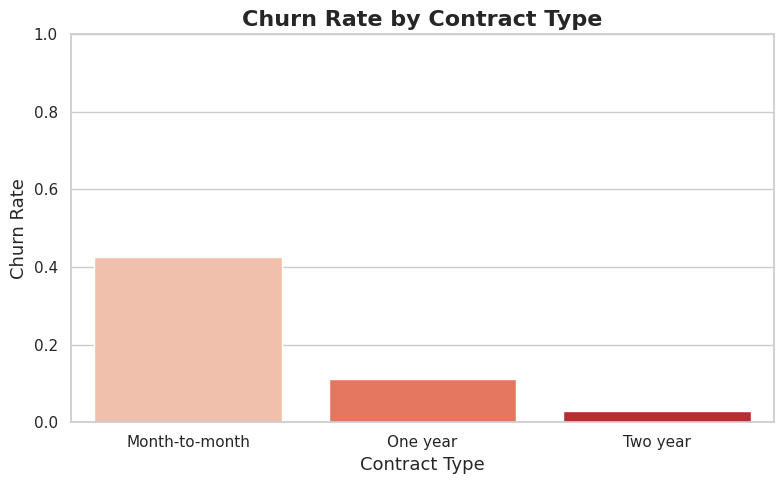

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Group data by Contract and calculate churn rate
churn_by_contract = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=churn_by_contract, x='Contract', y='Churn', palette='Reds')

plt.title('Churn Rate by Contract Type', fontsize=16, fontweight='bold')
plt.xlabel('Contract Type', fontsize=13)
plt.ylabel('Churn Rate', fontsize=13)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


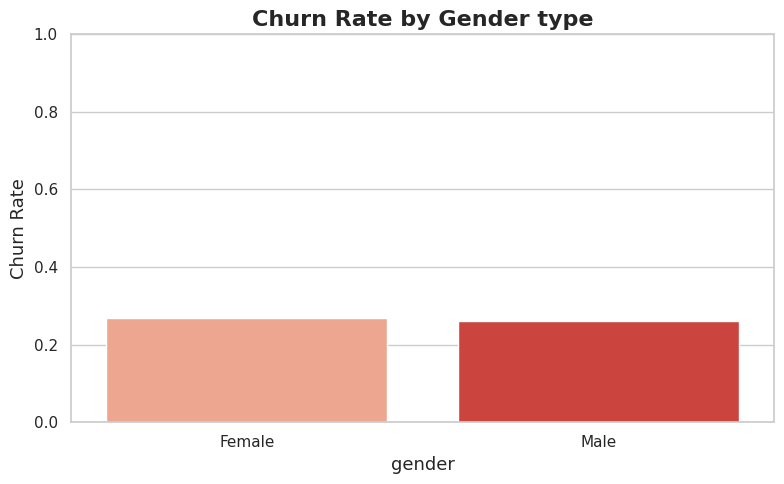

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Group data by Contract and calculate churn rate
churn_by_contract = df.groupby('gender')['Churn'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=churn_by_contract, x='gender', y='Churn', palette='Reds')

plt.title('Churn Rate by Gender type', fontsize=16, fontweight='bold')
plt.xlabel('gender', fontsize=13)
plt.ylabel('Churn Rate', fontsize=13)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


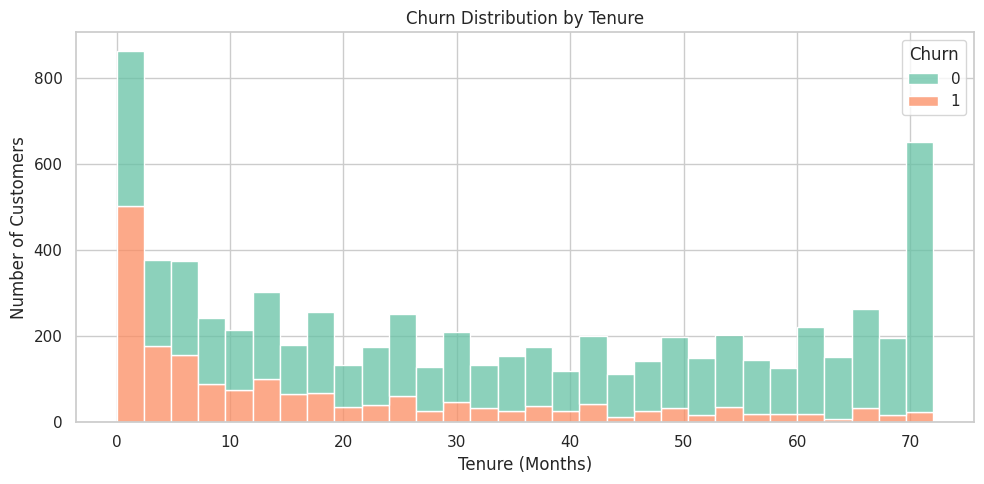

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='Set2')
plt.title('Churn Distribution by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Churn' to binary if not already
df['Churn_binary'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

**boxplots**

Text(0.5, 1.0, 'Monthly Charges vs Churn')

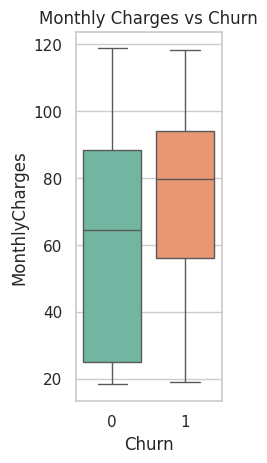

In [ ]:
# Boxplot 1: MonthlyCharges vs Churn
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Monthly Charges vs Churn')

Text(0.5, 1.0, 'Total Charges vs Churn')

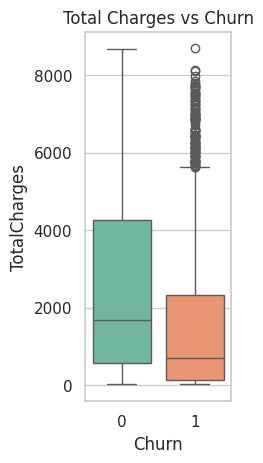

In [ ]:
# Boxplot 2: TotalCharges vs Churn
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='Set2')
plt.title('Total Charges vs Churn')

Text(0.5, 1.0, 'Tenure vs Churn')

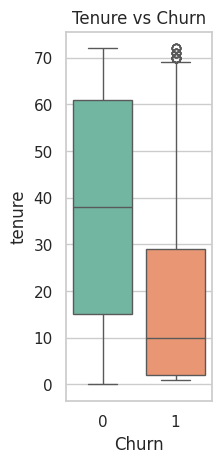

In [ ]:
# Boxplot 3: Tenure vs Churn
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2')
plt.title('Tenure vs Churn')

**histogram**

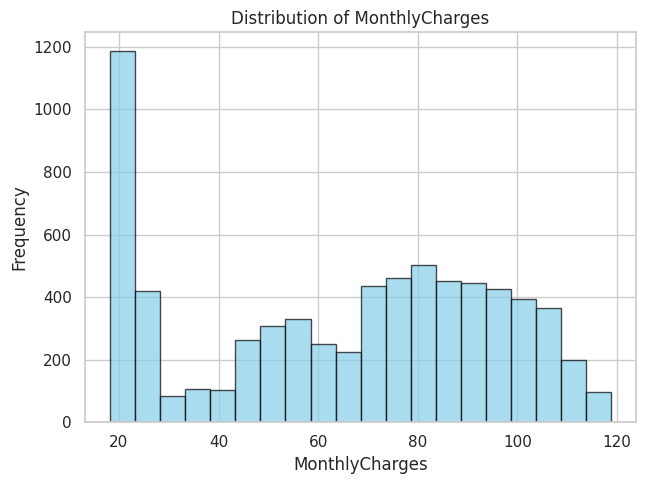

In [ ]:
import matplotlib.pyplot as plt

# List of numerical columns to plot
cols = ['MonthlyCharges']

# Create histograms
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


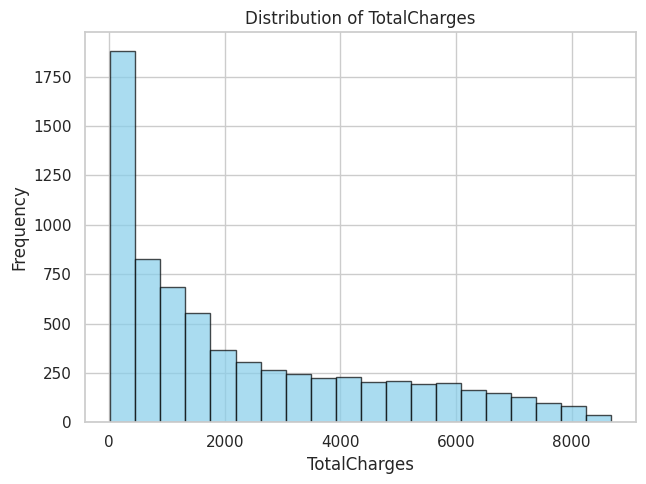

In [ ]:
# List of numerical columns to plot
cols = ['TotalCharges']

# Create histograms
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


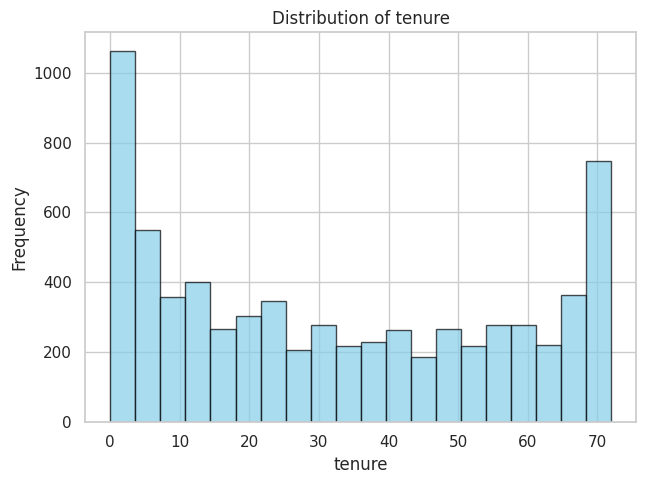

In [ ]:
import matplotlib.pyplot as plt

# List of numerical columns to plot
cols = ['tenure']

# Create histograms
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


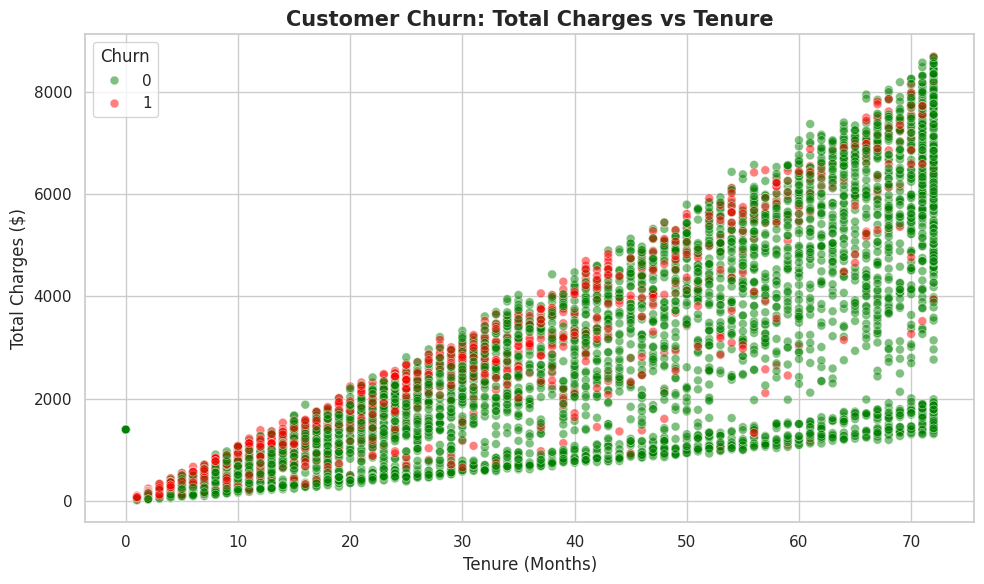

In [ ]:
# Filter out entries with missing or zero TotalCharges to clean the data
df_clean = df[df['TotalCharges'] > 0]

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Clean 2-metric scatter plot
sns.scatterplot(
    data=df_clean,
    x='tenure',
    y='TotalCharges',
    hue='Churn',
    palette={0: 'green', 1: 'red'},
    alpha=0.5,
    s=40
)

plt.title('Customer Churn: Total Charges vs Tenure', fontsize=15, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Total Charges ($)', fontsize=12)
plt.legend(title='Churn', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Drop missing or zero TotalCharges
df_clean = df[df['TotalCharges'] > 0].copy()

In [ ]:
# Sample 500 rows for better visualization
df_sample = df_clean.sample(n=500, random_state=42)

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

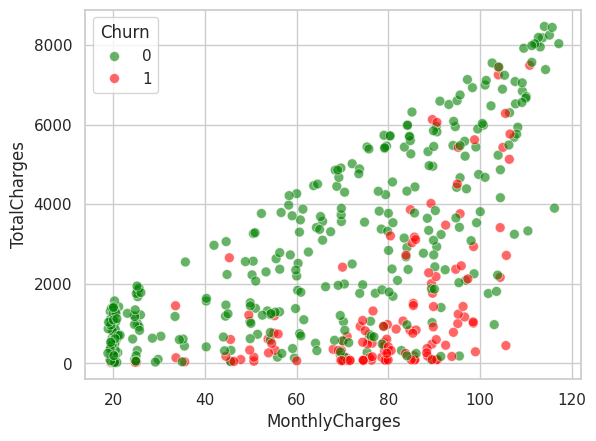

In [ ]:
# Scatter plot: Monthly Charges vs Total Charges
sns.scatterplot(
    data=df_sample,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='Churn',
    palette={0: 'green', 1: 'red'},
    alpha=0.6,
    s=50
)


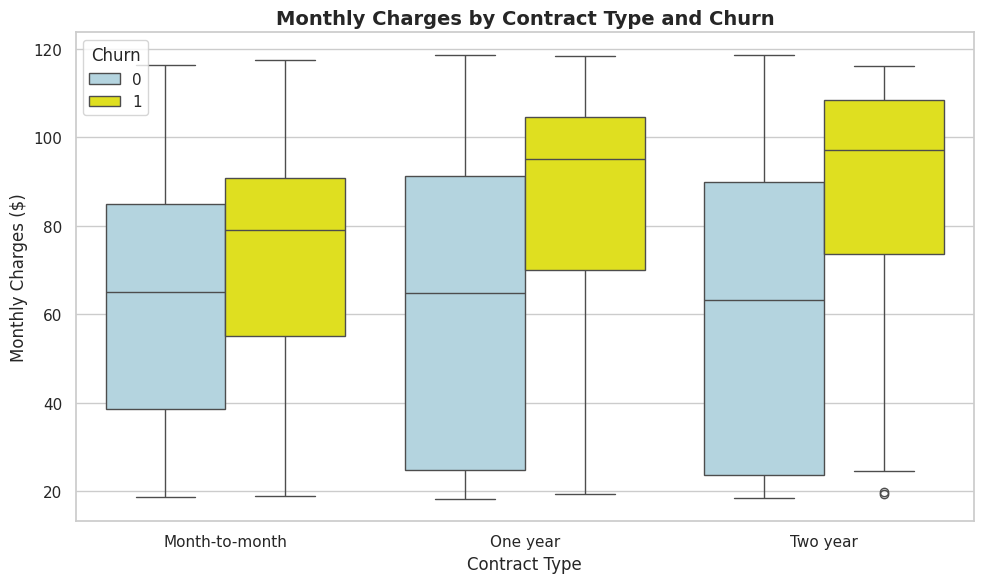

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Contract',
    y='MonthlyCharges',
    hue='Churn',
    palette={0: 'lightblue', 1: 'yellow'}
)

plt.title('Monthly Charges by Contract Type and Churn', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


FEATURE **ENGINEERING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Churn.csv to Churn (4).csv


In [ ]:
import pandas as pd
df = pd.read_csv('Churn.csv')

Final data shape: X = (7043, 20), y = (7043,)
Churn distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64


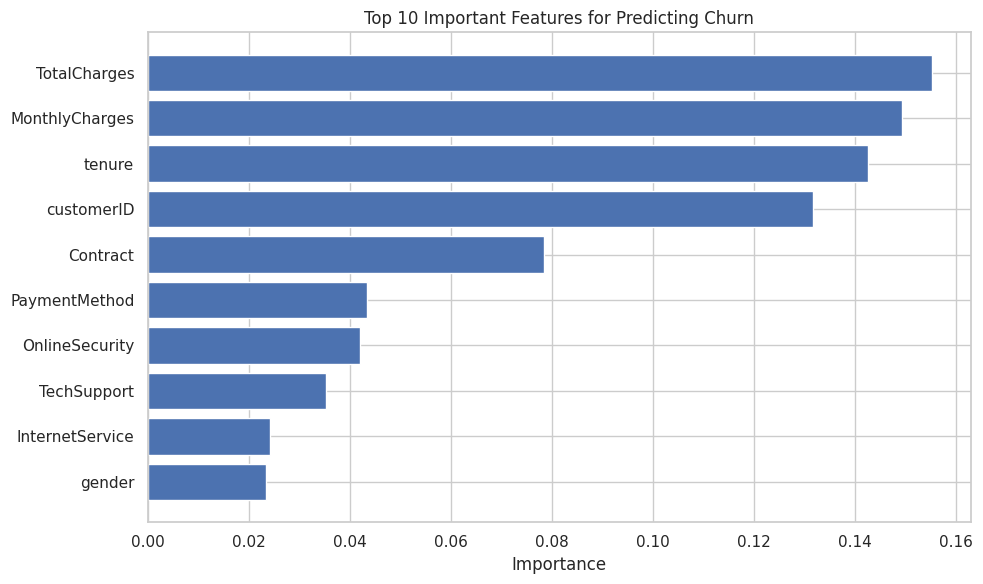

In [ ]:
# Strip whitespaces only on object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median (11 missing)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop 'Churn_binary' if exists
if 'Churn_binary' in df.columns:
    df.drop('Churn_binary', axis=1, inplace=True)

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode all categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Final data shape: X = {X.shape}, y = {y.shape}")
print(f"Churn distribution:\n{y.value_counts()}")

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'][:10][::-1], feature_df['Importance'][:10][::-1])
plt.xlabel("Importance")
plt.title("Top 10 Important Features for Predicting Churn")
plt.tight_layout()
plt.show()


In [ ]:
# Compute correlations with the target 'Churn'
corr_target = df.corr()['Churn'].sort_values(ascending=False)

In [ ]:
# Display top positively and negatively correlated features with Churn
print("Features most positively correlated with Churn:")
print(corr_target.head(10))

Features most positively correlated with Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
Name: Churn, dtype: float64


In [ ]:
print("Features most negatively correlated with Churn:")
print(corr_target.tail(10))

Features most negatively correlated with Churn:
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199037
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from google.colab import files

# This will open a file browser to upload your CSV
uploaded = files.upload()

Saving Churn.csv to Churn (1).csv


In [ ]:
import pandas as pd

# Replace 'Churn.csv' with the exact filename if it's different
df = pd.read_csv('Churn.csv')

# Preview the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Strip whitespace from object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Convert TotalCharges to numeric and fill missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode all categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Manually selected features based on domain knowledge
domain_features = ['tenure', 'Contract', 'MonthlyCharges', 'PaymentMethod', 'TotalCharges']

In [ ]:
# Check which of these features are in your dataset
domain_features = [f for f in domain_features if f in df.columns]


In [ ]:
print(f"Using domain knowledge, selected features: {domain_features}")

# Subset your data accordingly
X_domain = df[domain_features]
y = df['Churn']



Using domain knowledge, selected features: ['tenure', 'Contract', 'MonthlyCharges', 'PaymentMethod', 'TotalCharges']


In [ ]:
# Train model only on domain selected features
model_domain = RandomForestClassifier(random_state=42)
model_domain.fit(X_domain, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Feature importance for domain features
importances_domain = model_domain.feature_importances_
feature_df_domain = pd.DataFrame({'Feature': domain_features, 'Importance': importances_domain})
feature_df_domain = feature_df_domain.sort_values(by='Importance', ascending=False)

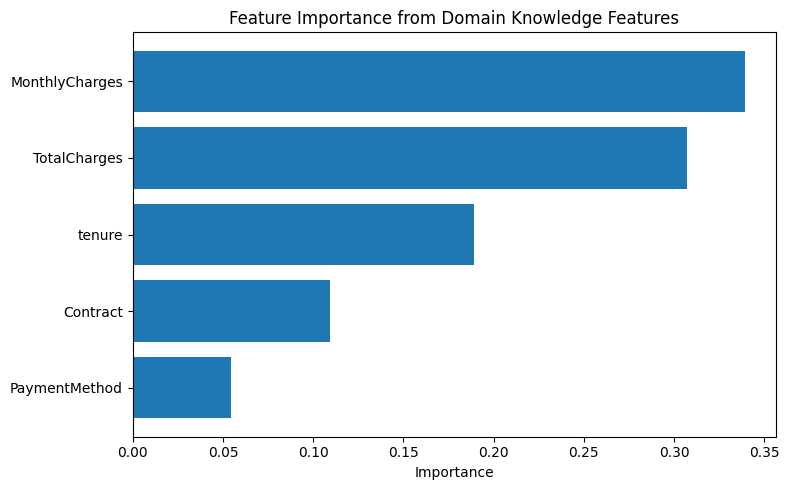

In [ ]:
# Plot domain feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_df_domain['Feature'][::-1], feature_df_domain['Importance'][::-1])
plt.xlabel("Importance")
plt.title("Feature Importance from Domain Knowledge Features")
plt.tight_layout()
plt.show()

MODELING AND **ALGORITHM**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Evaluate model
y_pred = log_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[932 104]
 [160 213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lin_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.13559611780892447
R^2 Score: 0.3033724358488016


In [ ]:
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid,
                    cv=5,
                    scoring='f1')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1036
           1       0.59      0.72      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.80      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.56      0.68      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report

lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Report:\n", classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.55      0.73      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np  # For square root

# After making predictions
y_pred = lin_model.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.36823378146080576


In [ ]:
from sklearn.metrics import mean_absolute_error

# After making predictions
y_pred = lin_model.predict(X_test)

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.2958840992675634


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8546275114639725


result presentation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=2000)  # Increased from default 100 to 2000
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
# Predict
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

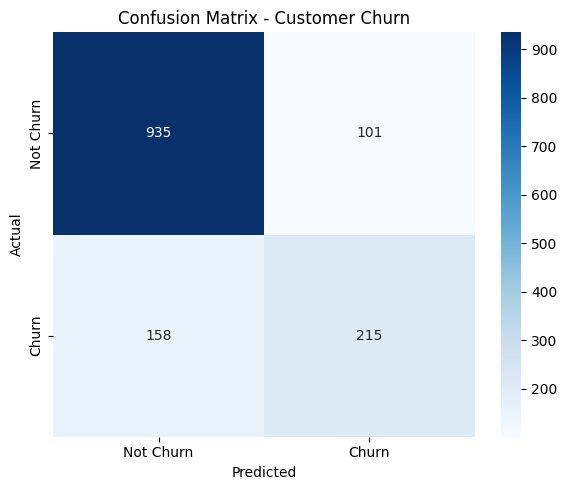

In [ ]:
# Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Customer Churn')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


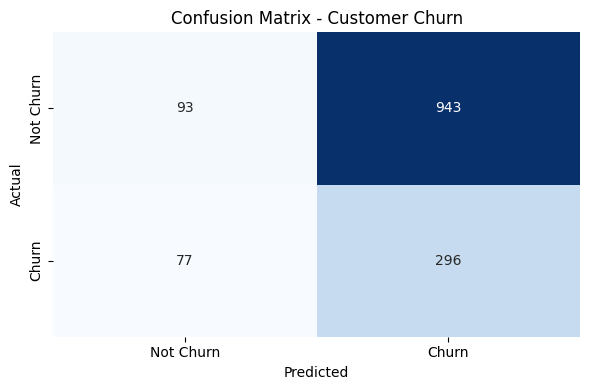

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix without color bar
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'],
            cbar=False)  # This removes the color scale

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Customer Churn')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
coef = pd.Series(model.coef_[0], index=X.columns)
print(coef.sort_values(ascending=False))

MonthlyCharges      0.672274
TotalCharges        0.596013
PaperlessBilling    0.175610
InternetService     0.174001
MultipleLines       0.066769
SeniorCitizen       0.066213
PaymentMethod       0.061722
Partner             0.032507
StreamingMovies     0.030054
StreamingTV        -0.012702
gender             -0.025811
customerID         -0.028720
DeviceProtection   -0.072957
Dependents         -0.083592
OnlineBackup       -0.137116
TechSupport        -0.220443
OnlineSecurity     -0.251350
PhoneService       -0.311241
Contract           -0.601796
tenure             -1.308123
dtype: float64


***heat map***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load dataset
df = pd.read_csv("Churn.csv")

In [ ]:
# Drop 'customerID' and handle missing values
df.drop('customerID', axis=1, inplace=True)
df = df.dropna()

In [ ]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

In [ ]:
# Encode categorical columns using Label Encoding
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [ ]:
# Generate correlation matrix
corr_matrix = df.corr()

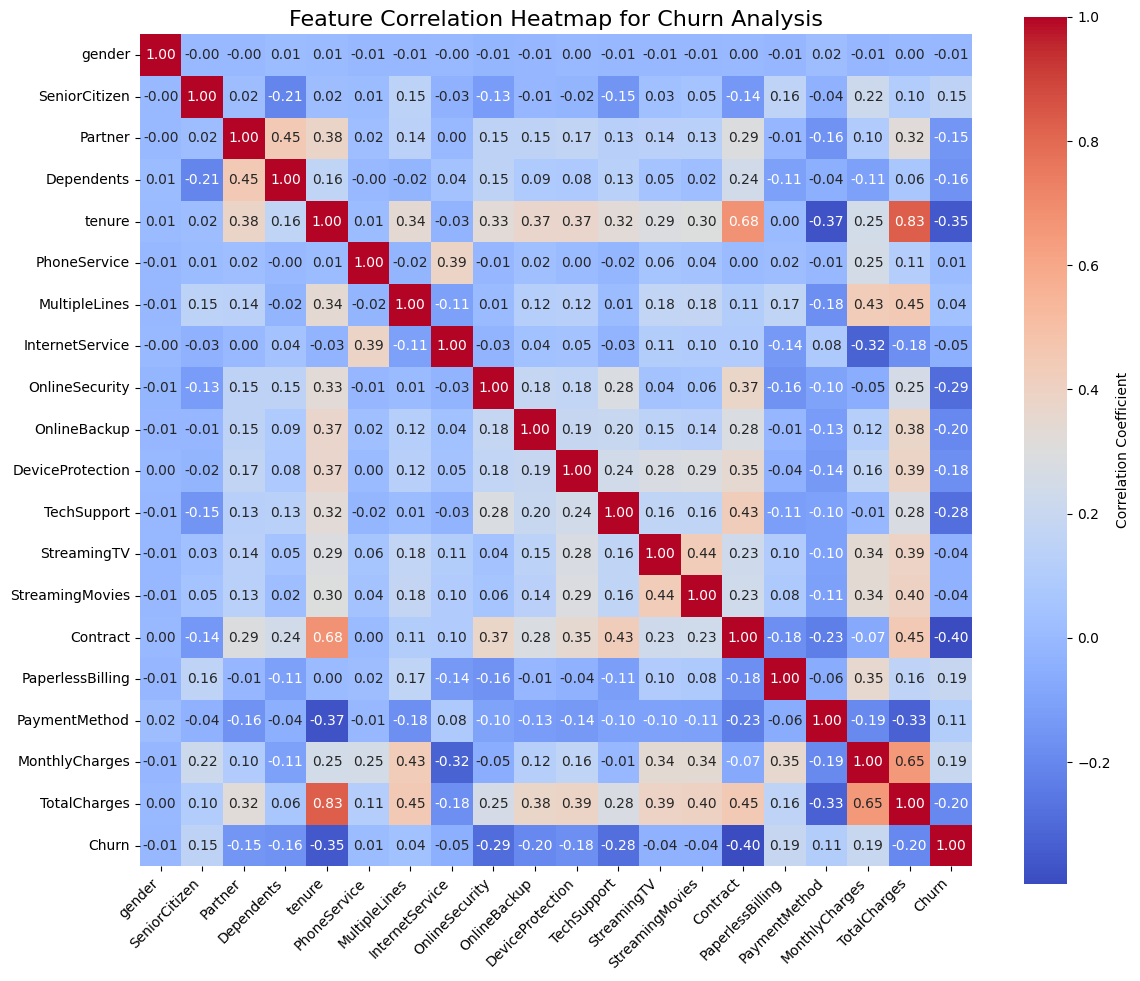

In [ ]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Feature Correlation Heatmap for Churn Analysis", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**heatmap for the best domain knowledge features**

In [ ]:
# Select only the important features (and encode categorical ones if needed)
selected_features = ['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract', 'PaymentMethod']

# Convert categorical features to numeric (one-hot encoding or label encoding)
df_encoded = df[selected_features].copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Compute correlation matrix
corr_matrix = df_encoded.corr()

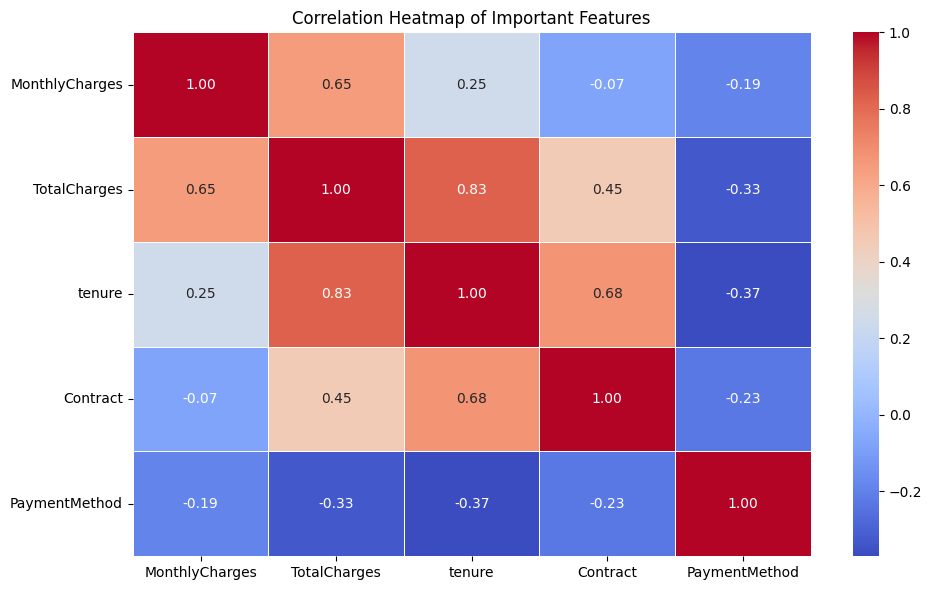

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Important Features")
plt.tight_layout()
plt.show()